# William Ching
# Amazon Reviews Notebook
---

In [9]:
# import relevant Python libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from sklearn import preprocessing
import seaborn as sns
import json
import random
import numpy as np
from scipy.stats import linregress
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

# **Objectives**

**Task for this Dataset:**

The task for this dataset will be a classification task. With this dataset we are attempting to create a machine learning model to accurately classify the language of texts from Amazon product reviews: English, Japanese, German, French, Chinese, and Spanish.

**Type of Machine Learning Problem:**

This problem is a supervised machine learning problem because the labels are provided in the dataset (language of data samples: 6 total). The labels are provided in the respective json file name (i.e. English reviews are provided in the json file with “en” in file name).

**Motivation:**

Increasingly, people are transitioning to online markets, like Amazon, as it becomes easier to place orders and purchase items over the internet. Amazon has been around since 1994 and has since then grown to millions of users around the world and has become a prominent global business. Amazon extended their marketplace to many regions where customers speak different languages. The language of a marketplace does not necessarily always match the language of a review placed by customers. In this project, we are going to try and create a machine learning model to classify the language of each text review: English, Japanese, German, French, Chinese, and Spanish. In essence, we are trying to create a model that can detect the language of texts. Such machine learning model can help break the language barrier between buyers and sellers. I find the concept of Languages and linguistics interesting because they are an integral part of humanity. Languages enable us to share ideas, thoughts and feelings. Every language has its unique rules and syntax, but they allow humans to communicate and express themselves in different ways. Understanding different languages is important for businesses to build connections and grow a network. This project gives us an opportunity to create a machine learning system by using methods learned in class to classify language of texts. 


# **Setup**

#### **Folder Structure:**
```
📂AmazonReviews
 ┃
 ┣ 📙AmazonReviews.ipynb
 ┗ 📂Data
    ┃
    ┣ 📂Test
    ┃  ┣ 📝 dataset_de_test.json
    ┃  ┣ 📝 dataset_en_test.json
    ┃  ┣ 📝 dataset_es_test.json
    ┃  ┣ 📝 dataset_fr_test.json
    ┃  ┣ 📝 dataset_ja_test.json
    ┃  ┗ 📝 dataset_zh_test.json
    ┗ 📂Train
       ┣ 📝 dataset_de_train.json
       ┣ 📝 dataset_en_train.json
       ┣ 📝 dataset_es_train.json
       ┣ 📝 dataset_fr_train.json
       ┣ 📝 dataset_ja_train.json
       ┗ 📝 dataset_zh_train.json
 ```
 #### **Dataset link:**
 https://s3.console.aws.amazon.com/s3/buckets/amazon-reviews-ml/?region=us-west-2&tab=objects
 #### **Kernel:**
 base Python 3.9.12 Conda env

# **1. Brief Exploration of Dataset**

In this section, we will be carry out a brief exploration of our dataset. We must first note that the training data is given in 6 .json file (see folder structure) for each respective langauges: German (de), English (en), Spanish (es), French (fr), Japanese (ja), and Chinese (zh). In order to start any exploration, we must first parse the json data into our python environment.

In [2]:
all_reviews = []
en_reviews = []
de_reviews = []
es_reviews = []
fr_reviews = []
ja_reviews = []
zh_reviews = []
for line in open('Data/Train/dataset_de_train.json', 'r'):
    de_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_en_train.json', 'r'):
    en_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_es_train.json', 'r'):
    es_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_fr_train.json', 'r'):
    fr_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_ja_train.json', 'r'):
    ja_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))
for line in open('Data/Train/dataset_zh_train.json', 'r'):
    zh_reviews.append(json.loads(line))
    all_reviews.append(json.loads(line))

Now that we have parsed the json data into python lists (en_reviews, de_reviews, es_reviews, fr_reviews, ja_reviews, and zh_reviews) we can now begin our dataset exploration. One of the first details to observe is a sample format / structure of the data.

In [3]:
# sample review data:
print("de_reviews: ",de_reviews[0], "\n")
print("en_reviews: ",en_reviews[0], "\n")
print("es_reviews: ",es_reviews[0], "\n")
print("fr_reviews: ",fr_reviews[0], "\n")
print("ja_reviews: ",ja_reviews[0], "\n")
print("zh_reviews: ",zh_reviews[0], "\n")

de_reviews:  {'review_id': 'de_0203609', 'product_id': 'product_de_0865382', 'reviewer_id': 'reviewer_de_0267719', 'stars': '1', 'review_body': 'Armband ist leider nach 1 Jahr kaputt gegangen', 'review_title': 'Leider nach 1 Jahr kaputt', 'language': 'de', 'product_category': 'sports'} 

en_reviews:  {'review_id': 'en_0964290', 'product_id': 'product_en_0740675', 'reviewer_id': 'reviewer_en_0342986', 'stars': '1', 'review_body': "Arrived broken. Manufacturer defect. Two of the legs of the base were not completely formed, so there was no way to insert the casters. I unpackaged the entire chair and hardware before noticing this. So, I'll spend twice the amount of time boxing up the whole useless thing and send it back with a 1-star review of part of a chair I never got to sit in. I will go so far as to include a picture of what their injection molding and quality assurance process missed though. I will be hesitant to buy again. It makes me wonder if there aren't missing structures and su

It can be seen that each reviews python list contains a list of python dict or objects. We can extract the raw features:

In [4]:
print("Raw Features: ", list(de_reviews[0].keys()))

Raw Features:  ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category']


We see that each json object have the following fields / raw features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'.

Next, we can take a look at the size of each reviews python list:

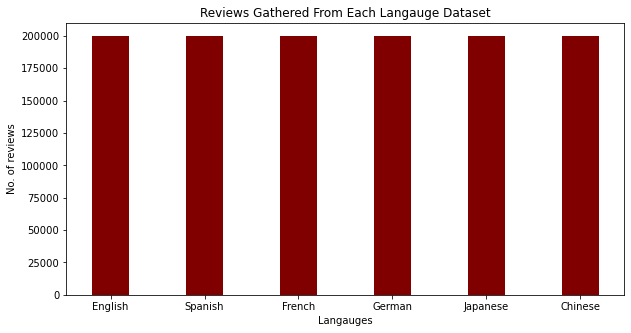

de_reviews size:  200000 reviews

en_reviews size:  200000 reviews

es_reviews size:  200000 reviews

fr_reviews size:  200000 reviews

ja_reviews size:  200000 reviews

zh_reviews size:  200000 reviews

Total number of training samples:  1200000 reviews



In [5]:
# Exploring size of data
langauge_count = {'English': len(en_reviews), 'Spanish': len(es_reviews), 'French': len(fr_reviews), 'German': len(de_reviews), 'Japanese': len(ja_reviews), 'Chinese': len(zh_reviews)}

lang = list(langauge_count.keys())
values = list(langauge_count.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(lang, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Langauges")
plt.ylabel("No. of reviews")
plt.title("Reviews Gathered From Each Langauge Dataset")
plt.show()
print("de_reviews size: ",len(de_reviews), "reviews\n")
print("en_reviews size: ",len(en_reviews), "reviews\n")
print("es_reviews size: ",len(es_reviews), "reviews\n")
print("fr_reviews size: ",len(fr_reviews), "reviews\n")
print("ja_reviews size: ",len(ja_reviews), "reviews\n")
print("zh_reviews size: ",len(zh_reviews), "reviews\n")

print("Total number of training samples: ", len(de_reviews) + len(en_reviews) + len(es_reviews) + len(fr_reviews) + len(ja_reviews) + len(zh_reviews), "reviews\n")


Note that there are a total of 1.2 million reivews with 200,000 reviews from each lanaguage .json file. Based on the dataset, we see that the data is pretty much uniform across all langauges. 

We will be parsing the raw data from json file into pandas dataframes. Since this is a large dataset, pandas library has built-in routines to allow for faster processing of big data. Here we are displaying a cleaner plot and pie chart of the dataset.

<AxesSubplot:ylabel='stars'>

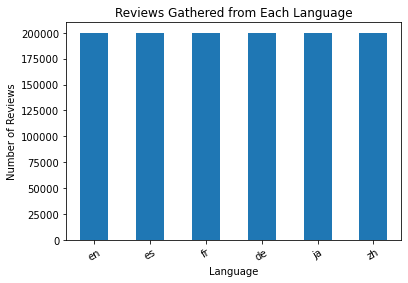

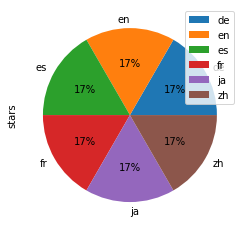

In [7]:
en_df = pd.read_json('dataset_en_train.json', lines=True, orient='columns')
es_df = pd.read_json('dataset_es_train.json', lines=True, orient='columns')
fr_df = pd.read_json('dataset_fr_train.json', lines=True, orient='columns')
de_df = pd.read_json('dataset_de_train.json', lines=True, orient='columns')
ja_df = pd.read_json('dataset_ja_train.json', lines=True, orient='columns')
zh_df = pd.read_json('dataset_zh_train.json', lines=True, orient='columns')
lang_frames = [en_df, es_df, fr_df, de_df, ja_df, zh_df]
all_reviews_df = pd.concat(lang_frames)
all_reviews_df['language'].value_counts().plot(kind="bar", title="Reviews Gathered from Each Language")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Reviews Gathered from Each Language")
plt.xlabel("Language")
plt.ylabel("Number of Reviews")
all_reviews_df.groupby(['language']).sum().plot(kind='pie', y='stars', autopct='%1.0f%%')

Note that there are a total of 1.2 million reivews with 200,000 reviews from each lanaguage .json file. Based on the dataset, we see that the data is pretty much uniform across all langauges. The pie chart also shows that the dataset is balanced among all six language. Each reviews from each language comprise of approximately 17% of the total reviews. 

We will also check for null values in the dataset / pandas dataframe.

In [8]:
all_reviews_df.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

We see that there are no null values present in this dataset.

# **2. Pre-processing**

On top of parsing the json data into pandas dataframe, we will be employing smapling method to the large dataset. The reason for sampling is because we do not have enough computing or processing power to analyze all of the 1.2 million samples in the dataset. We will be sampling 1000 reviews from each language json data.

In [10]:
en_df = pd.read_json('dataset_en_train.json', lines=True, orient='columns').sample(1000)
es_df = pd.read_json('dataset_es_train.json', lines=True, orient='columns').sample(1000)
fr_df = pd.read_json('dataset_fr_train.json', lines=True, orient='columns').sample(1000)
de_df = pd.read_json('dataset_de_train.json', lines=True, orient='columns').sample(1000)
ja_df = pd.read_json('dataset_ja_train.json', lines=True, orient='columns').sample(1000)
zh_df = pd.read_json('dataset_zh_train.json', lines=True, orient='columns').sample(1000)
lang_frames = [en_df, es_df, fr_df, de_df, ja_df, zh_df]
all_reviews_df = pd.concat(lang_frames)
print('English Reviews: ', len(en_df))
print('Spanish Reviews: ', len(es_df))
print('French Reviews: ', len(fr_df))
print('German Reviews:  ', len(de_df))
print('Japanese Reviews: ', len(ja_df))
print('Chinese Reviews',len(zh_df))
print('Total Reviews: ',len(all_reviews_df))

ValueError: Expected object or value

We need to do some preprocessing for the data. The text data must meet the following preprocessing conditions:

1. All the texts were converted to lower case.
2. All the digits were removed from the text sentences.
3. Punctuation marks and special characters were removed.
4. All the sentences were concatenated with space in between.
5. Series of contiguous white spaces were replaced by single space.

By cleaning our raw text data this way, we will be able to use sklearn's CountVectorizer() to create our bags of words model (see section 3 Feature Extraction / Engineering and Feature learning).

In [12]:
#remove special characters from text column
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.replace('\W', ' ', regex=True)
# remove numbers and digits form text
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.replace('\d', ' ', regex=True)
# convert text to lower case
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.lower()
# remove n spaces and convert to a single space
all_reviews_df['review_title'] = all_reviews_df['review_title'].str.replace('\s{2,}', ' ', regex=True)
# remove leading and trailing spaces
all_reviews_df['review_title'].str.strip()
all_reviews_df.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,i ll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,the product is junk,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc
5,en_0420650,product_en_0705898,reviewer_en_0155342,1,Poor quality. The material was fuzzy from day ...,poor quality the material was fuzzy from day one,en,industrial_supplies
6,en_0206383,product_en_0041998,reviewer_en_0005698,1,Ordered 2 they shipped 1 promised by certain d...,not reliable,en,home
7,en_0638563,product_en_0523280,reviewer_en_0363065,1,"Followed directions, did not work as advertised.",waste of money,en,kitchen
8,en_0331944,product_en_0737171,reviewer_en_0434580,1,There is a terribly done band across the top. ...,picture doesn t represent well,en,apparel
9,en_0220290,product_en_0912236,reviewer_en_0514794,1,"Unless you have this jam-packed full of items,...",collapses on itself,en,automotive


We will be removing all the columns that we will not be needing for our analysis. We will be keeping our raw text data: review_title, and label: language.

In [14]:
all_reviews_df = all_reviews_df[["review_title", "language"]]
print(all_reviews_df.head(2))
print(all_reviews_df.shape)

                                        review_title language
0  i ll spend twice the amount of time boxing up ...       en
1                                       not use able       en
(1200000, 2)


# **3. Feature Extraction / Feature Learning**

In our next step, we will be label encoding our output feature. Based on the way the dataframe is loaded. The labelencoder will encode language as: 

0: en, 
1: es,
2: fr,
3: de,
4: ja, and
5: zh.

By encoding our label, we will be able to perform Multinomial Naivve Bayes and K-Nearest Neighbors using sklearn library

In [1]:
le = preprocessing.LabelEncoder();
all_reviews_df['language'] = le.fit_transform(all_reviews_df['language'])
all_reviews_df.head()

NameError: name 'preprocessing' is not defined

Next, we will transform our raw text data into numerical values by using the bags of words model. The bag of words model works by describing the occurrence of words within a document. We only keep track of word count and disregard grammar / syntax. We can use CountVectorizer() to help us create our bag of words model.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

X = all_reviews_df['review_title']
Y = all_reviews_df['language']

CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

print(X.shape)

# 4. **Processing**

We will now begin processing the data. We will perform Multinomial Naive Bayes and K-Nearest Neighbors classifiers. 

We will start off by using Multinomial Naive Bayes for multiclass classification. We will use the NultinomialNB() to help us implement this. We first instantiate the MultinomialNB object, and then fit the data using .fit() with our input feature and output feature as paramters.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate #import cross_val_score from sklearn.model_selection

model1 = MultinomialNB()
model1.fit(X, Y)

Next, we will use K Nearest Neighbors to create our second model. We will be using KNeighborsClassifier() from sklearn to help us implement our model. First, we must choose k. With the help of cross_validate() from sklearn, we can determine our optimal k value by finding the input that maximizes mean_validation_scores.

In [ ]:
k_values = list(range(1, 21)) 
cross_validation_scores_model = [cross_validate(KNeighborsClassifier(n_neighbors = k), X, Y) for k in k_values] #compute cross validation scores for each alpha for Ridge Regression
mean_validation_scores_model = [data["test_score"].mean() for data in cross_validation_scores_model] #compute mean of cross validation scores
std_validation_scores_model = [data["test_score"].std() for data in cross_validation_scores_model] #compute standard deviation of cross validation scores
best_k = k_values[np.argmax(mean_validation_scores_model)] #determine which alphs gives us best cross validation score

model3 = KNeighborsClassifier(n_neighbors = best_k)
model3.fit(X, Y)

# **5. Comparative Analysis**

In order to test our Multinomial naive bayes and K-Nearest Neighbor classifer, we will use our test data. Our test data is also stored in json format, so we will have to parse the json data into pandas dataframe just like how we parsed our training data.

In [ ]:
en_df_test = pd.read_json('dataset_en_test.json', lines=True, orient='columns')
es_df_test = pd.read_json('dataset_es_test.json', lines=True, orient='columns')
fr_df_test = pd.read_json('dataset_fr_test.json', lines=True, orient='columns')
de_df_test = pd.read_json('dataset_de_test.json', lines=True, orient='columns')
ja_df_test = pd.read_json('dataset_ja_test.json', lines=True, orient='columns')
zh_df_test = pd.read_json('dataset_zh_test.json', lines=True, orient='columns')
lang_frames_test = [en_df_test, es_df_test, fr_df_test, de_df_test, ja_df_test, zh_df_test]
all_reviews_df_test = pd.concat(lang_frames_test)
print('English Reviews: ', len(en_df_test))
print('Spanish Reviews: ', len(es_df_test))
print('French Reviews: ', len(fr_df_test))
print('German Reviews:  ', len(de_df_test))
print('Japanese Reviews: ', len(ja_df_test))
print('Chinese Reviews',len(zh_df_test))
print('Total Reviews: ',len(all_reviews_df_test))

Next we will clean the test data and use the cleaned data into our models. We will compare the models by comparing the two confusion matrices.

In [ ]:
from sklearn.metrics import confusion_matrix

#remove special characters from text column
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.replace('\W', ' ', regex=True)
# remove numbers and digits form text
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.replace('\d', ' ', regex=True)
# convert text to lower case
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.lower()
# remove n spaces and convert to a single space
all_reviews_df_test['review_title'] = all_reviews_df_test['review_title'].str.replace('\s{2,}', ' ', regex=True)
# remove leading and trailing spaces
all_reviews_df_test['review_title'].str.strip()

all_reviews_df_test = all_reviews_df_test[["review_body", "review_title", "language"]]

all_reviews_df_test['language'] = le.transform(all_reviews_df_test['language'])


X = all_reviews_df_test['review_title']
Y = all_reviews_df_test['language']
X = CV.transform(X).toarray()

Y_pred1 = model1.predict(X)
conf_mat1 = confusion_matrix(Y, Y_pred1, labels = model1.classes_)

Y_pred3 = model3.predict(X)
conf_mat3 = confusion_matrix(Y, Y_pred3, labels = model3.classes_)

print(conf_mat1)
print(conf_mat3)

from sklearn.metrics import plot_confusion_matrix



To plot our cofusion matrices, we can use ConfusionMatrixDisplay() from sklearn

In [2]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels= ['0', '1', '2', '3', '4', '5'])
disp1.plot()
plt.show()
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_mat2, display_labels= ['0', '1', '2', '3', '4', '5'])
disp2.plot()
plt.show()

NameError: name 'conf_mat1' is not defined

Upon analyzing both confusion matrices, we see that both classifers perform poorly when trying to classify japanese text and chinese texts.